In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio

In [2]:
train = pd.read_csv('/Users/abhinava/Downloads/cifar10Labels.csv')

In [3]:
train.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


automobile


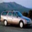

In [6]:
img_idx = 5
print(train.label[img_idx])
Image.open('/Users/abhinava/Downloads/cifar10/'+str(img_idx)+'.png')

In [9]:
train_data = train.iloc[:40000,:]
test_data = train.iloc[40000:,:]

In [13]:
train_data.tail()

,id,label
39995,39996,airplane
39996,39997,automobile
39997,39998,frog
39998,39999,bird
39999,40000,ship


In [14]:
test_data.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [24]:
temp = []
for img_name in train_data.id:
    img_file = f"{img_name}.png"
    img_path = os.path.join('/Users/abhinava/Downloads/cifar10',img_file)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [25]:
temp = []
for img_name in test_data.id:
    img_file = f"{img_name}.png"
    img_path = os.path.join('/Users/abhinava/Downloads/cifar10',img_file)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

In [26]:
train_x = train_x/255.0
test_x = test_x/255.0

In [45]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,InputLayer
from tensorflow.keras import utils
import keras
from keras.layers import Dropout
from keras import initializers, constraints, regularizers

In [34]:
lb = LabelEncoder()
train_y = lb.fit_transform(train_data.label)
train_y = keras.utils.to_categorical(train_y)

In [36]:
input_unit = (32,32,3)
dense_nrs = 500
opt_nrs = 10

In [46]:
#model definiton
model = Sequential([
    InputLayer(shape=input_unit),  # e.g., input_unit = (32, 32, 3)
    Flatten(),
    Dense(
        units=dense_nrs,  # e.g., dense_nrs = 128
        kernel_initializer='he_normal',
        bias_initializer=initializers.Constant(value=0.01),
        kernel_regularizer=regularizers.l2(0.01),  # Ridge = L2
        activation='relu',
        kernel_constraint=constraints.max_norm(3)
    ),
    Dropout(0.30),
    Dense(
        units=opt_nrs,  # e.g., opt_nrs = 10 for 10 classes
        kernel_initializer='he_normal',
        activation='softmax'
    )
])

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,541,510 (5.88 MB)

 Trainable params: 1,541,510 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
def models_with_different_optimizers(list_of_optimizers):
    for i in range(len(list_of_optimizers)):
        model.compile(optimizer = list_of_optimizers[i],
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        print('Building model using '+str(list_of_optimizers[i])+' optimizer')
        history = model.fit(train_x,train_y,batch_size = 128,epochs = 50,verbose = 1, validation_split = 0.2)
optims = [keras.optimizers.Adam(), keras.optimizers.Adadelta(), 
          keras.optimizers.Adagrad(), keras.optimizers.RMSprop(), 
          keras.optimizers.SGD()]
# Calling the function
models_with_different_optimizers(optims)

Building model using <keras.src.optimizers.adam.Adam object at 0x3938cc410> optimizer
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2843 - loss: 2.0990 - val_accuracy: 0.3524 - val_loss: 1.8983
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2839 - loss: 2.0250 - val_accuracy: 0.3195 - val_loss: 1.9707
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2972 - loss: 1.9958 - val_accuracy: 0.3555 - val_loss: 1.8983
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2972 - loss: 1.9851 - val_accuracy: 0.3523 - val_loss: 1.9086
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2974 - loss: 2.0003 - val_accuracy: 0.3481 - val_loss: 1.9280
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2898 - loss: 1.9940 - val_accuracy: 0.3232 - val_loss: 1.9296
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2912 - loss: 1.9993 - val_accuracy: 0.3307 - val_loss: 1.9305
Epoch 8/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2806 - loss: 1.9844 - val_accuracy: 0.3130 - val_loss: 1.9559
Building model using <keras.src.optimizers.adadelta.Adadelta object at 0x3936ff3d0> optimizer
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2792 - loss: 2.0053 - val_accuracy: 0.3420 - val_loss: 1.9252
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2817 - loss: 1.9923 - val_accuracy: 0.3460 - val_loss: 1.9118
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2905 - loss: 1.9766 - val_accuracy: 0.3471 - val_loss: 1.9036
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2909 - loss: 1.9719 - val_accuracy: 0.3469 - val_loss: 1.8965
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2926 - loss: 1.9692 - val_accuracy: 0.3498 - val_loss: 1.8881
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2961 - loss: 1.9630 - val_accuracy: 0.3540 - val_loss: 1.8795
Epoch 7/50
250

250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.3044 - loss: 1.9302 - val_accuracy: 0.3534 - val_loss: 1.8619
Epoch 50/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3052 - loss: 1.9408 - val_accuracy: 0.3536 - val_loss: 1.8618
Building model using <keras.src.optimizers.adagrad.Adagrad object at 0x394a17450> optimizer
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2924 - loss: 1.9475 - val_accuracy: 0.3553 - val_loss: 1.8622
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2993 - loss: 1.9399 - val_accuracy: 0.3557 - val_loss: 1.8567
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2954 - loss: 1.9367 - val_accuracy: 0.3549 - val_loss: 1.8567
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3035 - loss: 1.9349 - val_accuracy: 0.3559 - val_loss: 1.8596
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3062 - loss: 1.9301 - val_accuracy: 0.3555 - val_loss: 1.8594
Epoch 6/50
250/

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3148 - loss: 1.8945 - val_accuracy: 0.3598 - val_loss: 1.8344
Epoch 49/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3166 - loss: 1.8975 - val_accuracy: 0.3610 - val_loss: 1.8340
Epoch 50/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3098 - loss: 1.9034 - val_accuracy: 0.3607 - val_loss: 1.8324
Building model using <keras.src.optimizers.rmsprop.RMSprop object at 0x394a25490> optimizer
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2282 - loss: 2.3023 - val_accuracy: 0.2477 - val_loss: 2.0520
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2466 - loss: 2.1235 - val_accuracy: 0.2894 - val_loss: 1.9752
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2527 - loss: 2.0820 - val_accuracy: 0.1708 - val_loss: 2.3824
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2533 - loss: 2.0883 - val_accuracy: 0.3147 - val_loss: 1.9666
Epoch 5/50
250

250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2705 - loss: 2.0463 - val_accuracy: 0.2955 - val_loss: 2.0128
Epoch 48/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2746 - loss: 2.0492 - val_accuracy: 0.3092 - val_loss: 1.9899
Epoch 49/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.2697 - loss: 2.0488 - val_accuracy: 0.3004 - val_loss: 1.9596
Epoch 50/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2654 - loss: 2.0444 - val_accuracy: 0.3245 - val_loss: 1.9930
Building model using <keras.src.optimizers.sgd.SGD object at 0x394a2e510> optimizer
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3069 - loss: 1.9493 - val_accuracy: 0.3579 - val_loss: 1.8733
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3065 - loss: 1.9417 - val_accuracy: 0.3604 - val_loss: 1.8685
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2966 - loss: 1.9376 - val_accuracy: 0.3626 - val_loss: 1.8694
Epoch 4/50
250/250 ━━

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3174 - loss: 1.8954 - val_accuracy: 0.3776 - val_loss: 1.8130
Epoch 47/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3167 - loss: 1.8959 - val_accuracy: 0.3733 - val_loss: 1.8209
Epoch 48/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3199 - loss: 1.8897 - val_accuracy: 0.3685 - val_loss: 1.8137
Epoch 49/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.3168 - loss: 1.8919 - val_accuracy: 0.3651 - val_loss: 1.8118
Epoch 50/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3246 - loss: 1.8902 - val_accuracy: 0.3799 - val_loss: 1.8065


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2467 - loss: 3.1710 - val_accuracy: 0.3541 - val_loss: 1.9659
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3102 - loss: 2.0147 - val_accuracy: 0.3526 - val_loss: 1.9302
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3045 - loss: 2.0023 - val_accuracy: 0.3535 - val_loss: 1.9307
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3075 - loss: 1.9955 - val_accuracy: 0.3369 - val_loss: 1.9664
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3067 - loss: 2.0084 - val_accuracy: 0.3296 - val_loss: 1.9429
Epoch 6/50
180/250 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2912 - loss: 2.0096

KeyboardInterrupt: 